In [1]:
import time
import pandas as pd
import numpy as np
import datetime
import os
import gc
from functools import partial
import matplotlib.pyplot as plt
from utils import load_data, get_logger, get_data_path
from clean_session import preprocess_sessions
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
train_input = pd.read_parquet('./cache/train_inputs_no_imp.snappy')

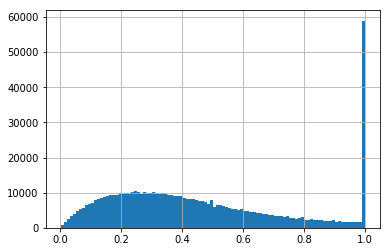

In [3]:
train_input.price_24.hist(bins=100)

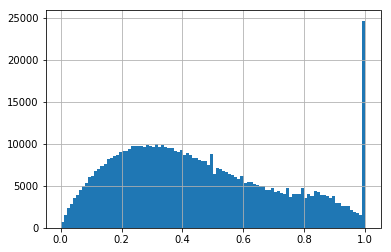

In [4]:
train_input.price_10.hist(bins=100)

In [34]:
# # price_grp = train_input.groupby('target')['price_24']
# # for i in price_grp.groupby(level=0):
# #     print(i[1].droplevel(level=0))
# #     i[1].droplevel(level=0).hist()
# #     break
# plt.figure(figsize=(20,10))
# for i in range(25):
#     train_input[train_input.target==i]['price_24'].hist(bins=50, label=f'{i}', alpha=0.8, density=True)
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

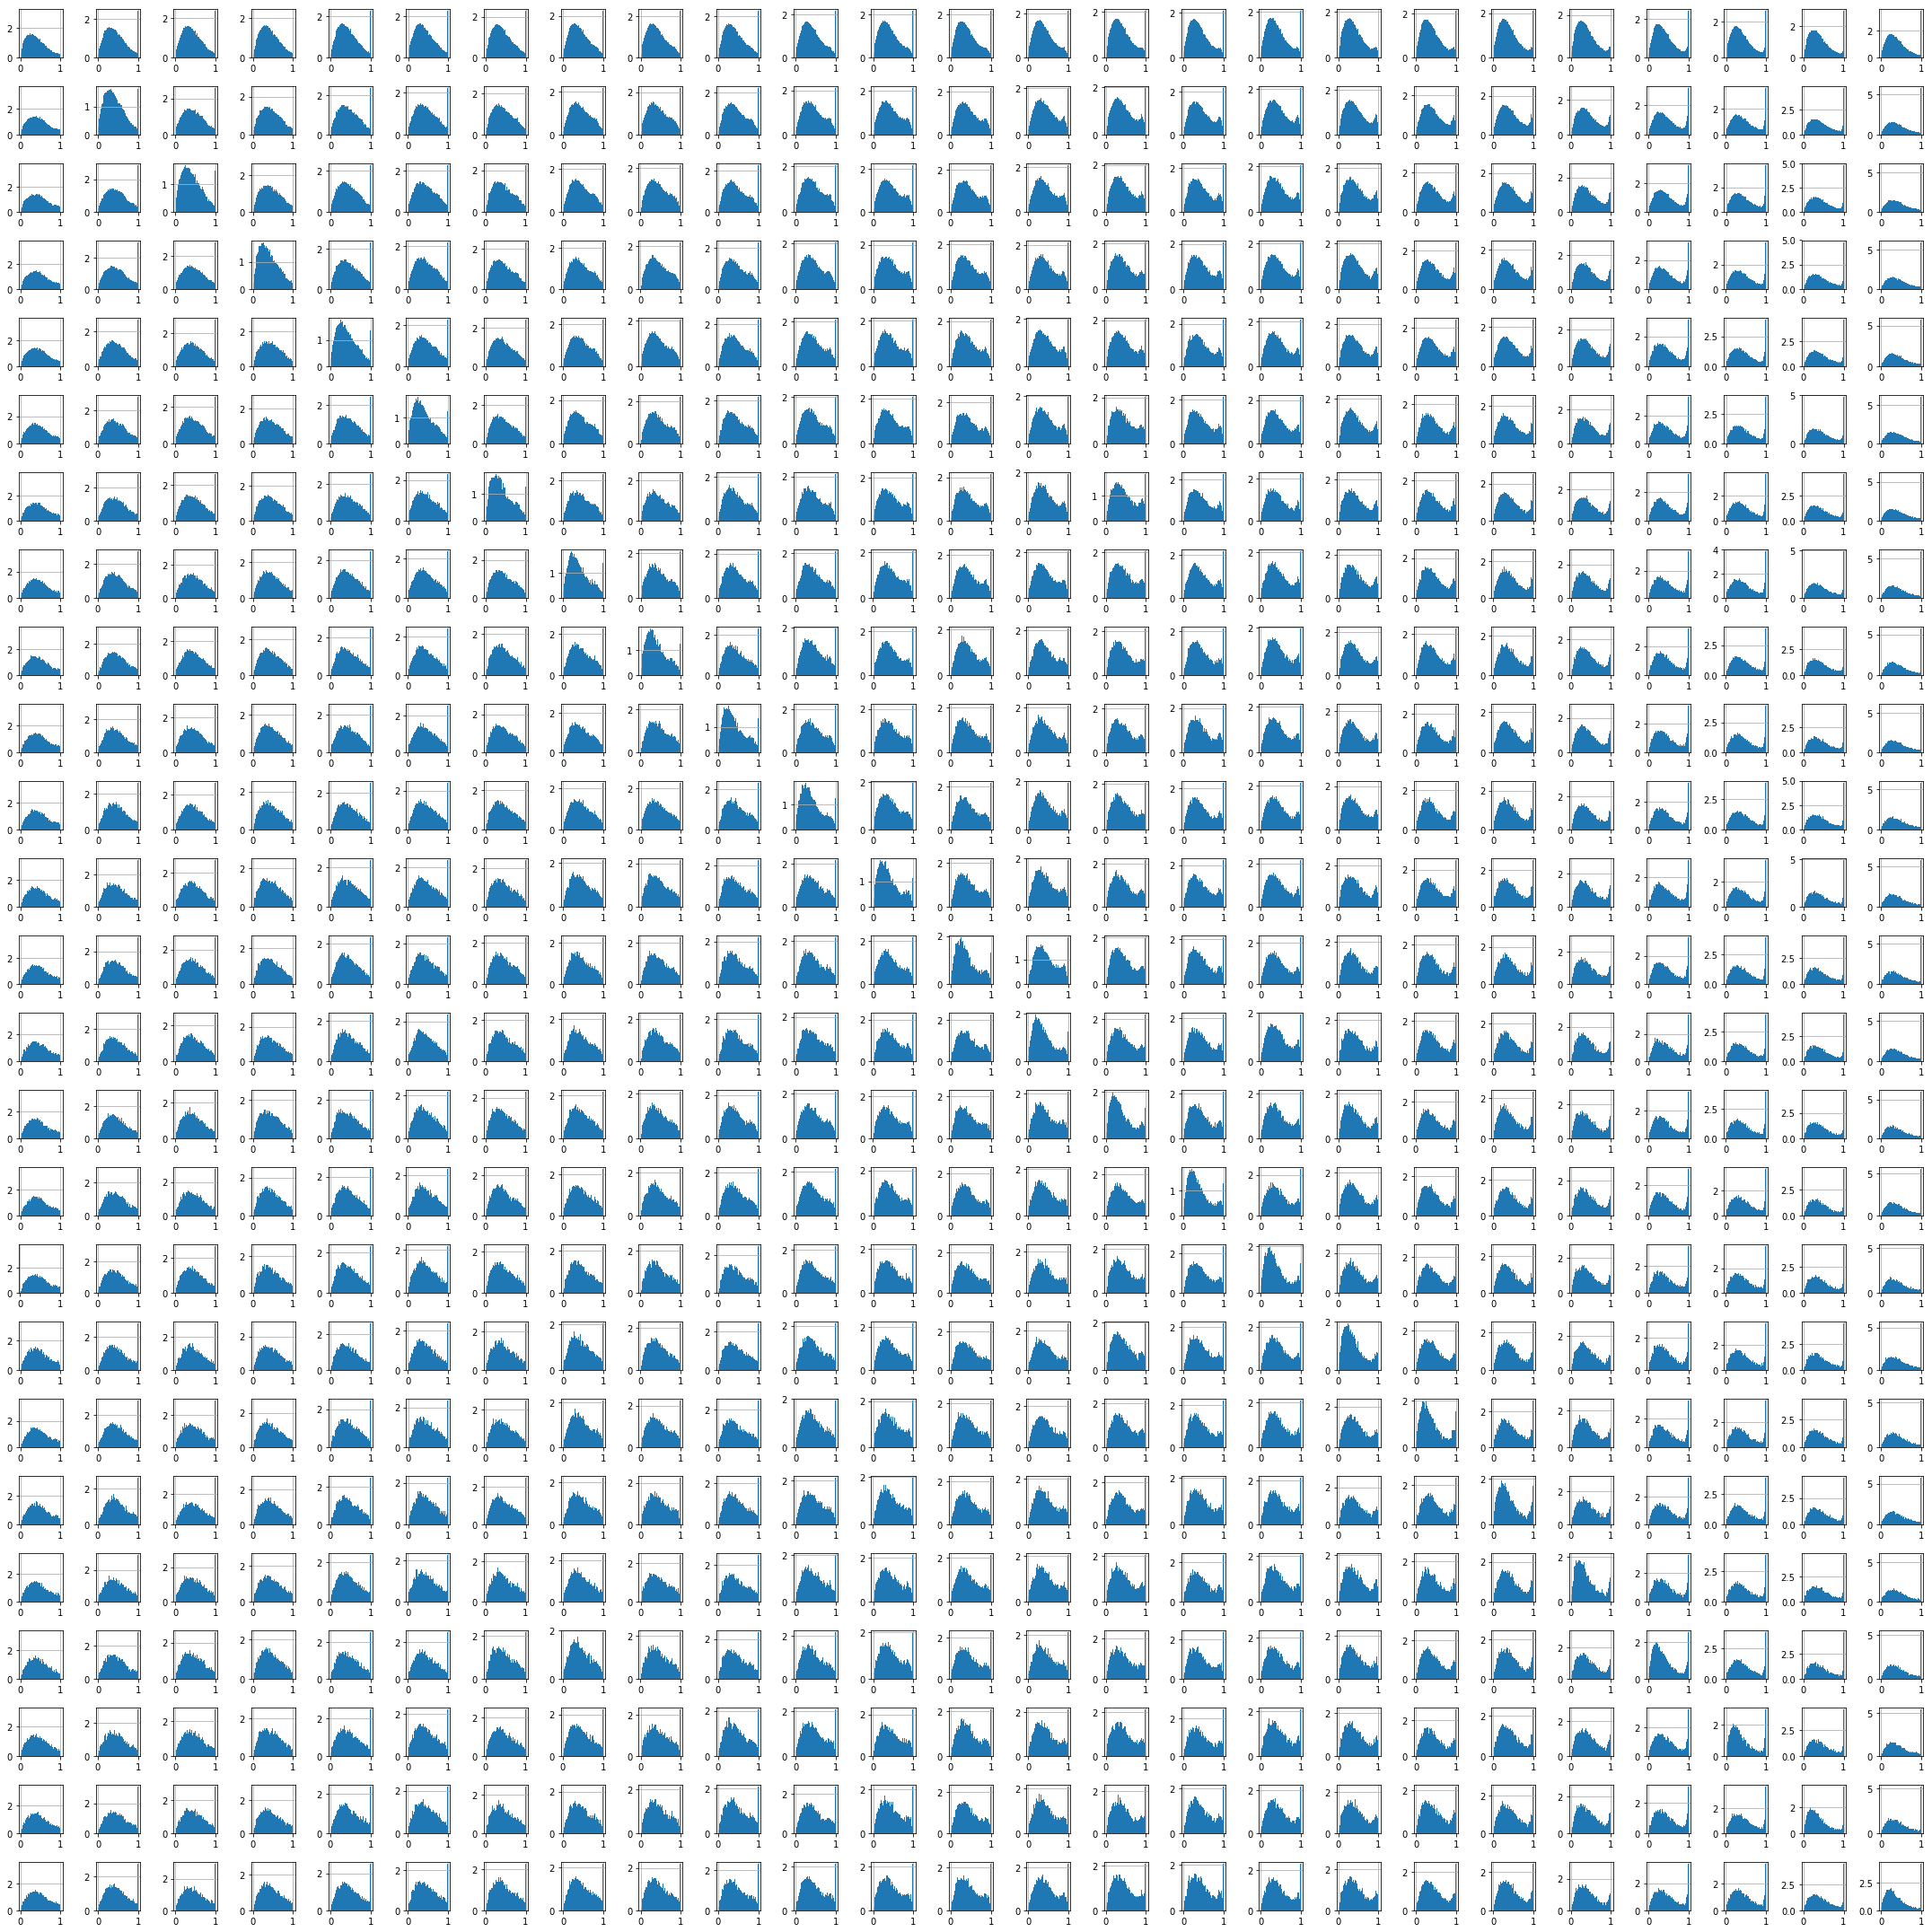

In [42]:
fig, axes = plt.subplots(ncols=25, nrows=25, figsize=(30,30))
for i in range(25):
    for j in range(25):
        print(i, j, end='\r')
        df_ij = train_input[train_input.target==i][f'price_{j}']
        df_ij.hist(bins=50, ax=axes[i, j], density=True)
plt.tight_layout()

In [5]:
train_input.groupby('target')['price_24'].value_counts().groupby(level=0).head()

target  price_24
0       1.000000    16204
        0.500000      991
        0.333333      779
        0.250000      561
        0.400000      488
1       1.000000     6294
        0.500000      240
        0.333333      141
        0.400000      127
        0.666667      118
2       1.000000     4490
        0.500000      143
        0.333333      110
        0.400000       86
        0.250000       74
3       1.000000     3639
        0.500000      144
        0.333333       97
        0.250000       63
        0.400000       62
4       1.000000     3034
        0.500000      132
        0.333333       90
        0.250000       70
        0.666667       63
5       1.000000     2578
        0.500000       85
        0.333333       69
        0.250000       51
        0.666667       46
                    ...  
19      1.000000      810
        0.500000       32
        0.333333       20
        0.400000       20
        0.750000       20
20      1.000000      834
        0.500000     

In [8]:
train_input.groupby('target')['price_10'].value_counts().groupby(level=0).head()

target  price_10
0       1.000000    9868
        0.500000    1044
        0.333333     762
        0.250000     496
        0.400000     482
1       1.000000    2155
        0.500000     247
        0.333333     177
        0.666667     152
        0.750000     140
2       1.000000    1462
        0.500000     192
        0.666667     108
        0.333333     106
        0.800000      94
3       1.000000    1163
        0.500000     171
        0.333333      96
        0.666667      95
        0.800000      89
4       1.000000    1033
        0.500000     124
        0.333333      82
        0.800000      77
        0.833333      69
5       1.000000     792
        0.500000      87
        0.333333      67
        0.666667      60
        0.800000      56
                    ... 
19      1.000000     283
        0.500000      32
        0.333333      21
        0.750000      18
        0.800000      18
20      1.000000     259
        0.500000      36
        0.800000      20
        

In [6]:
train_input[[f'price_{i}' for i in range(25)]].describe()

,price_0,price_1,price_2,price_3,price_4,price_5,price_6,price_7,price_8,price_9,...,price_15,price_16,price_17,price_18,price_19,price_20,price_21,price_22,price_23,price_24
count,628594.000000,628594.000000,628594.000000,628594.000000,628594.000000,628594.000000,628594.000000,628594.000000,628594.000000,628594.000000,...,628594.000000,628594.000000,628594.000000,628594.000000,628594.000000,628594.000000,628594.000000,628594.000000,628594.000000,628594.000000
mean,0.467569,0.464769,0.464206,0.462470,0.461797,0.460571,0.459794,0.459060,0.458492,0.457109,...,0.449848,0.448906,0.448797,0.449403,0.448228,0.448487,0.449358,0.449195,0.449493,0.450674
std,0.268367,0.257093,0.256529,0.256316,0.255955,0.256320,0.257859,0.258028,0.258907,0.260516,...,0.265674,0.265922,0.267327,0.269817,0.269704,0.271420,0.274295,0.274794,0.276542,0.279627
min,0.001002,0.001062,0.001064,0.001112,0.000778,0.000801,0.000650,0.000600,0.000778,0.000503,...,0.001000,0.001200,0.000900,0.000758,0.001164,0.001224,0.001200,0.001000,0.001000,0.001217
25%,0.253435,0.261111,0.260754,0.258537,0.258427,0.256100,0.253731,0.252396,0.251462,0.248590,...,0.237875,0.236968,0.235899,0.234323,0.233674,0.232966,0.231183,0.231343,0.230769,0.229630
50%,0.428571,0.431219,0.430380,0.427522,0.426557,0.423621,0.421348,0.420000,0.418605,0.415505,...,0.400000,0.398693,0.397590,0.396396,0.395349,0.393617,0.392405,0.391960,0.391304,0.390288
75%,0.647826,0.638252,0.640000,0.640000,0.640954,0.641176,0.641975,0.641892,0.642202,0.641221,...,0.629213,0.626866,0.626087,0.627156,0.623711,0.623762,0.625899,0.623656,0.622951,0.625000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
from create_model_inputs import compute_session_fts, prepare_data, flogger

In [ ]:
logger = get_logger('create_model_inputs')
Filepath = get_data_path()


In [ ]:
mode='train'
nrows=1000000
logger.info(f'Prepare {mode} data')
t_init = time.time()
df = prepare_data(mode, convert_action_type=True, nrows=nrows, recompute=False)
logger.info('Compute session features')

In [ ]:
str_prices = np.concatenate(df.prices.dropna().str.split('|').values)
str_prices = [int(sp) for sp in str_prices]
# pd.value_counts(str_prices)
_ = plt.hist(str_prices)

In [ ]:
%%time
df = compute_session_fts(df, mode)

In [ ]:
str_prices = np.concatenate(df.prices.dropna().str.split('|').values)
str_prices = [int(sp) for sp in str_prices]
# pd.value_counts(str_prices)
_ = plt.hist(str_prices)

In [ ]:
logger.info('Only select last click-out from each session')
df = df.groupby('session_id').last().reset_index()
flogger(df, 'df shape after only selecting last click-out row each session')

# # log-transform on session_size feature
# logger.info('Log-transform on session_size feature')
# df['session_id_size'] = np.log(df['session_id_size'])

# # log1p-transform on timestamp_dwell_time_prior_clickout but will cliping upper to 1hr
# logger.info('Also log-transform on timestamp_dwell_time_prior_clickout but will cliping upper to 1hr')
# df['timestamp_dwell_time_prior_clickout'] = np.log1p(df['timestamp_dwell_time_prior_clickout'].clip(upper=60 ** 2))

In [ ]:
str_prices = np.concatenate(df.prices.dropna().str.split('|').values)
str_prices = [int(sp) for sp in str_prices]
# pd.value_counts(str_prices)
_ = plt.hist(str_prices)

In [ ]:
df['prices'] = df['prices'].str.split('|')
df['prices_int'] = df['prices'].apply(lambda x: [int(p) for p in x])

In [ ]:
str_prices = np.concatenate(df.prices_int.dropna().values)
# pd.value_counts(str_prices)
_ = plt.hist(str_prices)

In [ ]:
df['time_steps'] = df['prices_int'].str.len()
padding_mask = df['time_steps'] < 25
df.drop('time_steps', axis=1, inplace=True)

In [ ]:
df.prices.head()

In [ ]:
df.prices.iloc[0]

In [ ]:
df[df.prices.str.len()<25].prices.iloc[0]

In [ ]:
x = [int(i) for i in df[df.prices.str.len()<25].prices.iloc[0]]
x

In [ ]:
np.pad(x, (0, 25-len(x)), mode='constant', constant_values=0)

In [ ]:
type(np.nan)

In [ ]:
df.loc[padding_mask, 'prices_int'] = df.loc[padding_mask, 'prices_int'].apply(lambda x: np.pad(x, (0, 25-len(x)),
                                                                                       mode='constant',
                                                                                       constant_values=np.nan))

In [ ]:
str_prices = np.concatenate(df.prices_int.dropna().values)
# pd.value_counts(str_prices)
_ = plt.hist(str_prices)

In [ ]:
def normalize(ps):
    p_arr = np.array(ps)
    return p_arr / (p_arr.max())
df['prices_percentage_int'] = df['prices'].apply(normalize)

In [4]:
np.exp(np.log(3))

3.0000000000000004

In [2]:
train = pd.read_parquet('./cache/train_inputs_no_imp.snappy')

In [3]:
train.head()

,step,timestamp_session_duration,timestamp_dwell_time_prior_clickout,session_id_size,nf,price_0,price_1,price_2,price_3,price_4,...,price_19,price_20,price_21,price_22,price_23,price_24,n_imps,target,pos,at
0,5,293.0,5.468060,1.609438,NaN,0.164444,0.195556,0.193333,0.160000,0.124444,...,0.195556,0.222222,0.246667,0.411111,0.160000,0.082222,25,0,0.04,2.0
1,3,1.0,0.693147,0.693147,NaN,0.327801,1.000000,0.398340,0.211618,0.282158,...,0.248963,0.319502,0.190871,0.568465,0.331950,0.248963,25,19,0.80,1.0
2,18,197.0,3.828641,1.945910,NaN,0.756494,0.313312,0.478896,0.537338,0.277597,...,0.548701,0.146104,0.068182,0.097403,0.068182,0.199675,25,18,0.68,1.0
3,6,149.0,3.044522,1.386294,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14,13,0.52,1.0
4,1,NaN,NaN,0.000000,NaN,0.489899,0.510101,0.393939,0.378788,0.500000,...,0.580808,0.398990,1.000000,0.671717,0.570707,0.575758,25,0,NaN,NaN


In [5]:
train['session_id_size'] = np.exp(train['session_id_size'])

In [7]:
train.groupby('session_id_size')['target'].value_counts()

session_id_size  target
1.0              0         7051
                 1         1203
                 2          703
                 3          539
                 4          493
                 5          361
                 6          263
                 7          253
                 8          229
                 9          211
                 10         207
                 11         176
                 12         153
                 13         137
                 17         116
                 14         112
                 15         102
                 18          99
                 19          97
                 24          86
                 16          84
                 23          83
                 20          66
                 22          62
                 21          57
2.0              0         4227
                 1         1024
                 2          674
                 3          531
                 4          443
                

In [2]:
# test data
test = pd.read_csv('./data/test.csv')

In [3]:
subs = pd.read_csv('./data/submission_popular.csv')

In [20]:
test_sub = test[test.session_id.isin(subs.session_id.unique())].reset_index(drop=True)

In [21]:
last = test_sub.groupby('session_id').last().reset_index()

In [22]:
# test_sub.platform.value_counts()

In [23]:
last.head()

,session_id,user_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
0,0000059a39020,P2L70S1Y60IF,1541719950,1,clickout item,NaN,JP,"Sapporo, Japan",mobile,NaN,2251200|924581|4775012|10090928|2282660|895299...,54|42|64|51|62|42|61|54|53|56|54|53|57|59|44|4...
1,0000b9394297b,SKDEGHT3I151,1541606244,2,clickout item,Sassi di Matera,AR,"Matera, Italy",mobile,NaN,1044228|5670638|5875672|6033244|7917004|507857...,242|193|288|180|196|129|155|232|245|191|188|17...
2,0001650138d30,V3SQM6X57BNX,1541614783,1,clickout item,NaN,CA,"Banff, Canada",mobile,NaN,44394|44103|44247|44155|43972|44292|44404|4449...,259|220|99|210|283|252|152|192|179|213|199|175...
3,000177b850519,13UA01X5MOHZ,1541574580,4,clickout item,17011,TR,"Rome, Italy",desktop,NaN,17011|16122|17403|17040|17266|17295|17535|1757...,875|726|216|396|263|174|182|264|327|265|364|27...
4,00017b3b2c136,K0LALBSISIAC,1541565393,11,clickout item,6698142,CO,"Piedecuesta, Colombia",mobile,NaN,5723818|4341718|6298194|6698142|7952264|285957...,46|89|21|14|59|74|37|33|30|46|17|77|12|37|44|3...


In [24]:
last['imps'] = last.impressions.str.split('|')

In [25]:
last['nimp'] = last.imps.str.len()

In [26]:
866/last.shape[0]*100

0.34151901030472487

In [16]:
test_pred = pd.read_csv('./subs/lgb_sub_05-23.csv')

In [28]:
result = test_pred[test_pred.session_id.isin(last[last.nimp==1].session_id.unique())].reset_index(drop=True)

In [34]:
first = [i[0] for i in result.item_recommendations.str.split().tolist()]

In [36]:
result['f'] = first

In [38]:
merged = pd.merge(result, last[['session_id', 'impressions']], on='session_id')

In [39]:
merged.head()

,user_id,session_id,timestamp,step,item_recommendations,f,impressions
0,62CY1P9C44KR,002d39b5d542a,1541609027,8,2195066 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,2195066,2195066
1,TAUTLI293H5K,0056bf7fbecdb,1541619327,1,972673 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,972673,972673
2,7X92EQ2HHCXC,007946c8ff58a,1541554751,3,2717657 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,2717657,2717657
3,E4EV8507MO7F,009a5cfefbb11,1541590580,7,3435244 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,3435244,3435244
4,CZ0NUCK7YXTM,00c2ab1749758,1541611769,2,6475490 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,6475490,6475490


In [40]:
(merged['f'] != merged.impressions).sum()

0